In [1]:
import numpy as np
import scipy.constants as const
import uncertainties as unc
import matplotlib.pyplot as plt
import pandas as pd
import datetime
from datetime import date
from scipy.ndimage import gaussian_filter1d
%matplotlib inline

In [1]:
df = pd.read_excel('AM.xlsx')
df['TIME'] = [datetime.datetime.combine(datetime.date.today(), t) for t in df['TIME']]
df.head()

NameError: name 'pd' is not defined

In [3]:
def ad_adj(x):
    Datetimes =[]
    Values = []
    for i in x:
        Datetimes.append(i[0:11])
        Values.append(i[16:])
    return [Datetimes,Values]
        

In [4]:
dat = pd.read_csv('Test 1.csv')
sensor_data = pd.DataFrame(np.array(ad_adj(dat.Time.values)).T, columns = ['TIME','Resistance'])
sensor_data.dtypes

TIME          object
Resistance    object
dtype: object

In [5]:
from datetime import datetime, timedelta
sensor_data['Resistance'] = sensor_data['Resistance'].astype(float)
sensor_data['Resistance'] = sensor_data['Resistance']
sensor_data['TIME'] = pd.to_datetime(sensor_data['TIME'])
sensor_data['TIME'] = sensor_data['TIME'] + timedelta(minutes = 12)
sensor_data = sensor_data[(sensor_data[['TIME','Resistance']] != 0).all(axis=1)]
sensor_data.head(20)

,TIME,Resistance
0,2021-05-20 15:06:32.920,35054600.00
1,2021-05-20 15:06:33.420,35054600.00
2,2021-05-20 15:06:33.940,35054600.00
3,2021-05-20 15:06:34.440,70177800.00
4,2021-05-20 15:06:34.950,70177800.00
5,2021-05-20 15:06:35.460,23346868.00
6,2021-05-20 15:06:35.930,70177800.00
7,2021-05-20 15:06:36.470,23346868.00
8,2021-05-20 15:06:36.960,23346868.00
9,2021-05-20 15:06:37.470,35054600.00


In [6]:
sensor_data = sensor_data[sensor_data['Resistance'] < 70000] 
sensor_data = sensor_data[sensor_data['Resistance'] > 25000] 
sensor_data = sensor_data.sort_values(by = 'TIME')
sensor_data.head(20)

,TIME,Resistance
11,2021-05-20 15:06:38.470,33800.00
4584,2021-05-20 15:06:38.470,33800.00
4585,2021-05-20 15:06:38.960,33800.00
12,2021-05-20 15:06:38.960,33800.00
13,2021-05-20 15:06:39.470,33800.00
4586,2021-05-20 15:06:39.470,33800.00
14,2021-05-20 15:06:39.970,33800.00
4587,2021-05-20 15:06:39.970,33800.00
15,2021-05-20 15:06:40.470,33949.48
4588,2021-05-20 15:06:40.470,33949.48


In [7]:
from scipy.signal import savgol_filter
sensor_data['Resistance_Smooth'] = gaussian_filter1d(sensor_data['Resistance'], 30)

In [8]:
df = df[ df['TIME'] > sensor_data['TIME'].iloc[0]]
df = df[ df['TIME'] < sensor_data['TIME'].iloc[-1]]

<ipython-input-50-4f9341938c3e>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels([0,5,10,15,20,25,30,35,40])


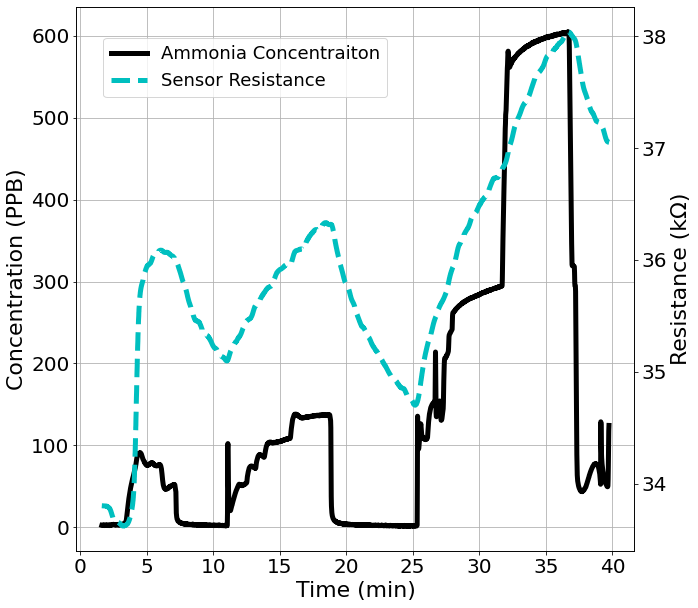

In [50]:
fig, ax1 = plt.subplots(figsize = (10,10))
ax2 = ax1.twinx()
ax1.grid()
ax1.plot(df['TIME'],df['NH3_raw'],'-k', label = 'Ammonia Concentraiton', linewidth = 5) #Piccaro
ax2.plot(sensor_data['TIME'],sensor_data['Resistance_Smooth']/1000,'--c',label = 'Sensor Resistance', linewidth = 5)#Sensor
#ax1.set_title('Sensor Response', fontsize = 32, fontweight ='bold')
ax1.set_ylabel('Concentration (PPB)',fontsize = 22)
ax2.set_ylabel('Resistance (k\u03A9)',fontsize = 22)
ax1.tick_params( labelsize=20)
ax2.tick_params( labelsize=20)
ax1.set_xlabel('Time (min)',fontsize = 22)
ax2.set_xticklabels([0,5,10,15,20,25,30,35,40])
fig.legend(loc='upper left', bbox_to_anchor=(.15, .85), fontsize = 18)

In [13]:
sensor_data['TIME'].iloc[-1] - sensor_data['TIME'].iloc[0]

Timedelta('0 days 00:38:06.700000')